<a href="https://colab.research.google.com/github/Ms-Ainebyona/Chest-Opacity-project/blob/colab-main/FINAL_CHEST_OPACITY_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting drive

In [336]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary libraries

In [337]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.utils
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Sequential
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import PIL
import PIL.Image
import pathlib
import glob
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.preprocessing import image

Data loading

In [338]:
train_dir="/content/drive/MyDrive/Train data"
predict_dir="/content/drive/MyDrive/Deep learning/new"
test_dir="/content/drive/MyDrive/Test data"

Model parameters

In [339]:
import keras
from tensorflow.keras import layers
img_height=200
img_width=200
batch_size=28


In [340]:

ds_test=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
#label_path,
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 #crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic" ,
  #seed=123,
                                                           
)

Found 100 files belonging to 2 classes.


In [341]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 #shuffle=True,
 seed=123, 
 validation_split=0.2,
 subset="training", 
  #crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic",                                                             
)
ds_validation=tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 #shuffle=True,
 seed=123,
 validation_split=0.2,
 subset="validation",
  #crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic", 
 )

ds_predict=tf.keras.preprocessing.image_dataset_from_directory(predict_dir, 
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 #shuffle=True,
 #seed=123,
#crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic" 
)

def augment(X,Y):
  image=tf.image.random_brightness(X,max_delta=0.05)  
  ds_train=ds_train.map(augment) 
  for epoch in range(100):
   for X,Y in ds_train:
     pass

Found 615 files belonging to 2 classes.
Using 492 files for training.
Found 615 files belonging to 2 classes.
Using 123 files for validation.
Found 50 files belonging to 1 classes.


In [342]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = ds_train.map(lambda x, y: (normalization_layer(x), y))

In [343]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_validation = ds_validation.cache().prefetch(buffer_size=AUTOTUNE)

Data Augmentation

In [344]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  1)),
    layers.RandomRotation(0.6),
    layers.RandomZoom(0.2),
  ]
)

Model definition

In [345]:
model=keras.Sequential([
    data_augmentation,
    layers.Input((200,200,1)),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(2),
    layers.Dense(128, activation='relu'),
  

])

Model compilation

In [346]:
model.compile(
    optimizer='adam',
    loss=[
        keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    ],
    metrics=["accuracy"],
)  
history= model.fit(ds_train,epochs=20,batch_size=28,validation_data=ds_validation,verbose=2)   

Epoch 1/20
18/18 - 4s - loss: 6.8395 - accuracy: 0.0000e+00 - val_loss: 4.6605 - val_accuracy: 0.0000e+00 - 4s/epoch - 210ms/step
Epoch 2/20
18/18 - 1s - loss: 4.5367 - accuracy: 0.0000e+00 - val_loss: 4.4959 - val_accuracy: 0.0000e+00 - 589ms/epoch - 33ms/step
Epoch 3/20
18/18 - 1s - loss: 4.2573 - accuracy: 0.0020 - val_loss: 4.2233 - val_accuracy: 0.0081 - 598ms/epoch - 33ms/step
Epoch 4/20
18/18 - 1s - loss: 3.8400 - accuracy: 0.0996 - val_loss: 3.6831 - val_accuracy: 0.4634 - 582ms/epoch - 32ms/step
Epoch 5/20
18/18 - 1s - loss: 3.2710 - accuracy: 0.5203 - val_loss: 3.2945 - val_accuracy: 0.4634 - 588ms/epoch - 33ms/step
Epoch 6/20
18/18 - 1s - loss: 3.0226 - accuracy: 0.5203 - val_loss: 3.1118 - val_accuracy: 0.4553 - 586ms/epoch - 33ms/step
Epoch 7/20
18/18 - 1s - loss: 2.8498 - accuracy: 0.5203 - val_loss: 3.0893 - val_accuracy: 0.4553 - 585ms/epoch - 33ms/step
Epoch 8/20
18/18 - 1s - loss: 2.7663 - accuracy: 0.5224 - val_loss: 3.1544 - val_accuracy: 0.4553 - 591ms/epoch - 33ms

In [347]:
model.evaluate(ds_validation, verbose=2)

5/5 - 0s - loss: 0.7907 - accuracy: 0.7398 - 62ms/epoch - 12ms/step


[0.790742814540863, 0.7398374080657959]

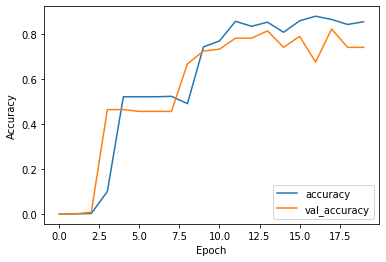

In [348]:
# Visualization of training accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

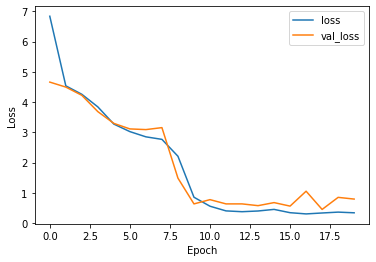

In [349]:
# Visualization of the training accuracy and loss curves
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

Predictions

In [350]:
# Predictions
preds = model.predict(ds_test)

In [351]:
# Get classes
pred_classes = (preds>=0.5).astype(int)

In [352]:

y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in ds_test:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

Confusion matrix for the test set of dataset 1(known images)

In [353]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(predicted_labels, correct_labels)

array([[50, 20],
       [ 0, 30]])

Classification report for performance of the model on the test set for dataset1 (known images)

In [354]:
from sklearn.metrics import classification_report
print(classification_report(
  correct_labels, 
  predicted_labels, 
  

))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        50
           1       1.00      0.60      0.75        50

    accuracy                           0.80       100
   macro avg       0.86      0.80      0.79       100
weighted avg       0.86      0.80      0.79       100



In [355]:
saved_model_path = "/content/drive/MyDrive/Models/custom5-weights/saved_model.h5"
model.save(saved_model_path)

In [356]:
from tensorflow.keras import layers, models, utils, losses, callbacks
import pandas as pd
import numpy as np

Using the model to predict each class of the unknown images

In [357]:
prediction_model_on_unknown = models.load_model(saved_model_path)
unknown_preds  = prediction_model_on_unknown.predict(ds_predict)
unknown_pred_classes = np.argmax(unknown_preds, axis=1)

In [358]:
res_df = pd.DataFrame({
    "patient" : ds_predict.file_paths,
    "diagnosis (0-Normal, 1-Sick)": unknown_pred_classes
    
})

res_df.head(5)

,patient,"diagnosis (0-Normal, 1-Sick)"
0,/content/drive/MyDrive/Deep learning/new/unkno...,1
1,/content/drive/MyDrive/Deep learning/new/unkno...,1
2,/content/drive/MyDrive/Deep learning/new/unkno...,0
3,/content/drive/MyDrive/Deep learning/new/unkno...,1
4,/content/drive/MyDrive/Deep learning/new/unkno...,0


Saving the predictions for each image in a csv

In [367]:
# save the dataframe as a csv file
res_df.to_csv("/content/drive/MyDrive/Models/custom5-weights/saved_model.h5", index=False)

Testing the model on dataset2 to determine the generalisation of the model

In [361]:
ds_test2=tf.keras.preprocessing.image_dataset_from_directory(test2_dir,
#label_path,
labels='inferred', 
label_mode="int", 
color_mode='grayscale',
batch_size=batch_size,
 image_size = (img_height,img_width),
 #crop_to_aspect_ratio=True,
  #interpolation="mitchellcubic" ,
  #seed=123,
                                                           
)

Found 224 files belonging to 2 classes.


In [362]:
# Predictions
preds = model.predict(ds_test2)

In [363]:
# Get classes
pred_classes = (preds>=0.5).astype(int)

In [364]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in ds_test2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [365]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(predicted_labels, correct_labels)

array([[64, 24],
       [48, 88]])

In [366]:
from sklearn.metrics import classification_report
print(classification_report(
  correct_labels, 
  predicted_labels, 
  

))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       112
           1       0.65      0.79      0.71       112

    accuracy                           0.68       224
   macro avg       0.69      0.68      0.67       224
weighted avg       0.69      0.68      0.67       224

